Este trecho importa quatro bibliotecas essenciais:

1. **random**: Gera números aleatórios para simulações e amostras.
2. **time**: Trabalha com o tempo, útil para medir o tempo de execução ou criar pausas no código.
3. **numpy (np)**: Realiza operações matemáticas e manipulação de arrays de forma eficiente.
4. **matplotlib.pyplot (plt)**: Cria gráficos e visualizações de dados de maneira simples.

Essas bibliotecas são fundamentais em análises de dados e simulações.


In [1]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

A função `calcular_valor_solucao` calcula o número total de "conflitos" em uma solução de um problema, como o das N-Rainhas.

- **Entrada**: Recebe uma lista `solucao`, onde cada índice representa uma linha e o valor no índice representa a coluna de uma rainha.
- **Processo**:
  - Itera sobre todos os pares de rainhas (i, j) para verificar:
    - Se estão na mesma coluna (`solucao[i] == solucao[j]`).
    - Se estão na mesma diagonal (`abs(solucao[i] - solucao[j]) == abs(i - j)`).
  - Incrementa `valor_total` para cada conflito detectado.
- **Saída**: Retorna o valor total de conflitos.

Essa função é útil para avaliar a qualidade de uma solução no contexto de problemas de otimização.


In [2]:
# Função para calcular o valor de conflito de uma solução (quantidade de conflitos)
def calcular_valor_solucao(solucao):
    """Calcula o valor total de 'conflitos' de rainhas numa solução."""
    n = len(solucao)
    valor_total = 0
    for i in range(n):
        for j in range(i + 1, n):
            # Conflitos: mesma coluna (linha é garantida pela codificação)
            if solucao[i] == solucao[j]:
                valor_total += 1
            # Conflitos diagonais
            if abs(solucao[i] - solucao[j]) == abs(i - j):
                valor_total += 1
    return valor_total

A função `gerar_populacao` cria uma população inicial para um algoritmo evolutivo ou de otimização, como no problema das N-Rainhas.

- **Entrada**:
  - `tamanho_populacao`: número de indivíduos na população.
  - `n`: número de rainhas (ou tamanho do tabuleiro).
- **Processo**:
  - Para cada indivíduo na população:
    - Utiliza `random.sample` para gerar uma lista de `n` números únicos, representando as posições das rainhas em colunas distintas.
  - Adiciona cada indivíduo à população.
- **Saída**: Retorna uma lista com a população gerada, onde cada elemento é uma solução possível.

Essa função é fundamental para inicializar a busca por soluções em algoritmos evolutivos.


In [3]:
# Função para gerar a população inicial
def gerar_populacao(tamanho_populacao, n):
    populacao = []
    for _ in range(tamanho_populacao):
        # Garante que as rainhas estão em colunas distintas
        individuo = random.sample(range(n), n)  # Gera uma lista única de n números, sem repetições
        populacao.append(individuo)
    return populacao


A função `calcular_aptidao` avalia a qualidade de um indivíduo com base no número de conflitos em uma solução.

- **Entrada**: Recebe um `individuo`, que é uma lista representando a posição das rainhas no tabuleiro.
- **Processo**:
  - Chama a função `calcular_valor_solucao` para determinar o número de conflitos da solução.
  - A aptidão é calculada como `28 - valor_conflito`, onde 28 é a aptidão máxima (sem conflitos) e 0 é a aptidão mínima (máximo de conflitos).
- **Saída**: Retorna o valor da aptidão, onde valores mais altos indicam melhores soluções.

Essa função é usada em algoritmos evolutivos para selecionar soluções de alta qualidade.


In [4]:
# Função para calcular a aptidão (quanto menor o valor de conflito, melhor)
def calcular_aptidao(individuo):
    valor_conflito = calcular_valor_solucao(individuo)
    return 28 - valor_conflito  # A solução ótima tem aptidão 28 e a solução ruim tem aptidão 0

A função `selecao_por_roleta` realiza a seleção de dois indivíduos para reprodução, utilizando o método da roleta, baseado nas aptidões da população.

- **Entrada**: Recebe a `populacao`, uma lista de soluções (indivíduos).
- **Processo**:
  - Calcula as aptidões de todos os indivíduos na população.
  - Determina o tamanho total da roleta, que é a soma das aptidões.
  - Para selecionar dois pais:
    - Realiza um sorteio aleatório dentro do intervalo de 1 até o total da roleta.
    - Acumula as aptidões dos indivíduos até que o sorteio seja alcançado, selecionando o indivíduo correspondente.
- **Saída**: Retorna uma lista com dois indivíduos selecionados para reprodução.

Esse método é usado para favorecer soluções com maior aptidão, mas mantendo uma chance de seleção para soluções menos aptas.


In [5]:
# Função para realizar a seleção por roleta
def selecao_por_roleta(populacao):
    aptidoes = [calcular_aptidao(ind) for ind in populacao]  # Calcula as aptidões uma vez
    tamanho_roleta = sum(aptidoes)
    selecionados = []
    for _ in range(2):  # Seleciona dois pais
        sorteio = random.randint(1, tamanho_roleta)
        soma = 0
        for i, individuo in enumerate(populacao):
            soma += aptidoes[i]
            if soma >= sorteio:
                selecionados.append(individuo)
                break
    return selecionados

### Função `cruzamento` (Corte de um ponto)
A função realiza o cruzamento entre dois pais para gerar dois filhos.

- **Entrada**: Recebe dois pais (`pai1` e `pai2`), ambos representados como listas de números.
- **Processo**:
  - Gera um ponto de corte aleatório.
  - Cria dois filhos combinando as partes dos pais: um filho pega a primeira parte do pai1 e a segunda parte do pai2, e o outro faz o inverso.
- **Saída**: Retorna os dois filhos gerados.

Este método é utilizado para combinar características de ambos os pais.

---

### Função `mutacao` (Bit Flip)
A função realiza uma mutação em um indivíduo, invertendo um bit aleatório.

- **Entrada**: Recebe um `individuo` (lista de números) e uma `taxa_mutacao` (probabilidade de ocorrer a mutação).
- **Processo**:
  - Converte o indivíduo para uma representação binária de 3 bits por número.
  - Com uma probabilidade determinada pela taxa de mutação, escolhe um bit aleatório e o inverte.
  - A mutação é aplicada em um número binário, e a sequência mutada é convertida de volta para números inteiros.
- **Saída**: Retorna o indivíduo após a mutação.

Essa função é usada para introduzir diversidade na população, evitando que o algoritmo fique preso em soluções subótimas.


In [6]:
# Função para realizar o cruzamento (corte de um ponto)
def cruzamento(pai1, pai2):
    n = len(pai1)
    ponto_corte = random.randint(1, n-1)  # Ponto de corte aleatório
    filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]
    filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
    return filho1, filho2

# Função para realizar a mutação (bit flip)
def mutacao(individuo, taxa_mutacao):
    # Converte cada número do indivíduo para binário de 3 bits
    individuo_binario = [format(x, '03b') for x in individuo]
    
    if random.random() < taxa_mutacao:
        # Escolhe um bit aleatório dentro do número binário
        elemtento_index = random.randint(0, len(individuo) - 1)
        bit_index = random.randint(0, len(individuo_binario[0]) - 1)
        
        # Converte a string binária em uma lista de caracteres para modificar o bit
        individuo_lista = list(individuo_binario[elemtento_index])
        
        # Inverte o bit aleatório
        individuo_lista[bit_index] = "1" if individuo_lista[bit_index] == "0" else "0"
        
        # Converte de volta para uma string e coloca na lista de binários
        individuo_binario[elemtento_index] = ''.join(individuo_lista)
    
    # Converte de volta para números inteiros a partir dos binários
    individuo_mutado = [int(binario, 2) for binario in individuo_binario]
    
    return individuo_mutado

### Função `selecao_elitista` (Seleção dos Sobreviventes)
A função realiza a seleção elitista, preservando os melhores indivíduos da população.

- **Entrada**: Recebe a `populacao`, o `tamanho_populacao` e o valor `n` (tamanho do tabuleiro).
- **Processo**:
  - Ordena a população com base na aptidão de cada indivíduo (menor número de conflitos).
  - Seleciona os `tamanho_populacao` melhores indivíduos, os quais sobrevivem à próxima geração.
- **Saída**: Retorna os melhores indivíduos da população.

Esse método garante que as melhores soluções sejam preservadas e transmitidas para a próxima geração.

---

### Função `mostrar_tabuleiro` (Exibição do Tabuleiro)
A função exibe a solução de um problema de N-Rainhas como um tabuleiro 8x8.

- **Entrada**: Recebe uma `solucao`, que é uma lista representando as posições das rainhas nas colunas.
- **Processo**:
  - Cria um tabuleiro vazio 8x8, representado como uma matriz de zeros.
  - Marca as posições das rainhas (representadas por 1) nas colunas correspondentes.
  - Exibe o tabuleiro linha por linha de forma legível.
- **Saída**: Imprime o tabuleiro no formato de uma matriz 8x8.

Essa função é útil para visualizar a solução de forma intuitiva.


In [7]:
# Função elitista para seleção dos sobreviventes
def selecao_elitista(populacao, tamanho_populacao, n):
    # Ordena a população pela aptidão (quanto menor o valor de conflito, melhor)
    populacao.sort(key=lambda ind: calcular_aptidao(ind), reverse=True)
    return populacao[:tamanho_populacao]  # Os melhores sobrevivem

# Função para mostrar o tabuleiro como matriz 8x8
def mostrar_tabuleiro(solucao):
    """Exibe a solução como um tabuleiro 8x8"""
    tabuleiro = [[0 for _ in range(8)] for _ in range(8)]  # Cria um tabuleiro vazio 8x8
    for linha, coluna in enumerate(solucao):
        tabuleiro[linha][coluna] = 1  # Marca a posição da rainha
    for linha in tabuleiro:
        print(' '.join(str(x) for x in linha))  # Exibe o tabuleiro de forma legível

### Fluxo do Algoritmo Genético

1. **Inicialização**:
   - Gerar população inicial (`gerar_populacao`).
   - Definir parâmetros (`tamanho_populacao`, `n`, `max_geracoes`, `taxa_crossover`, `taxa_mutacao`).
   - Inicializar contadores (`geracao`, `tempo_inicial`) e lista `melhoria_aptidao`.

2. **Condição de Término**:
   - Enquanto `geracao < max_geracoes`:
     - **Avaliar Melhor Aptidão**:
       - Calcular a melhor aptidão da população atual.
       - Armazenar a melhoria da aptidão ao longo das gerações.

     - **Verificar Solução Ótima**:
       - Se algum indivíduo não tem conflitos (valor de solução = 0):
         - Calcular o tempo de execução.
         - Retornar a solução ótima, número de gerações, tempo e melhoria de aptidão.

     - **Seleção de Pais**:
       - Selecionar dois pais utilizando a roleta (`selecao_por_roleta`).

     - **Cruzamento**:
       - Selecione aleatoriamente se ocorrerá cruzamento, com base em `taxa_crossover`.
       - Se ocorrer, gerar dois filhos (`cruzamento`).
       - Caso contrário, adicione os pais diretamente à nova população.

     - **Mutação**:
       - Aplicar mutação em cada indivíduo da nova população (`mutacao`).

     - **Seleção dos Sobreviventes**:
       - Selecionar os melhores indivíduos (elitista) para a nova população (`selecao_elitista`).

3. **Fim**:
   - Retornar a melhor solução encontrada, número de gerações, tempo de execução e a melhoria da aptidão ao longo das gerações.

---

**Fluxograma**:

```plaintext
[Início] --> [Gerar População Inicial] --> [Definir Parâmetros]
     |
     V
[Enquanto geracao < max_geracoes?] --> [Sim] --> [Avaliar Melhor Aptidão] --> [Verificar Solução Ótima?]
     |                                                        |
     |                                                        V
     |                                                     [Sim] --> [Retornar Solução Ótima]
     |                                                        |
     V                                                        V
[Seleção de Pais] --> [Cruzamento?] --> [Sim] --> [Gerar Filhos] --> [Mutação] --> [Seleção dos Sobreviventes]
     |                                                        |
     |<------------------- [Não] -----------------------------|
     |
     V
[Incrementar Geração]
     |
     V
[Fim] --> [Retornar Melhor Solução]


In [8]:
# Função principal do algoritmo genético
def algoritmo_genetico(tamanho_populacao=20, n=8, max_geracoes=1000, taxa_crossover=0.8, taxa_mutacao=0.03):
    populacao = gerar_populacao(tamanho_populacao, n)
    geracao = 0
    tempo_inicial = time.time()
    melhoria_aptidao = []  # Lista para armazenar a melhoria das aptidões ao longo das gerações
    
    while geracao < max_geracoes:
        nova_populacao = []

        # Verifica se a solução ótima foi encontrada
        melhor_aptidao = max(calcular_aptidao(ind) for ind in populacao)
        melhoria_aptidao.append(melhor_aptidao)  # Armazena a melhor aptidão na geração
        
        for individuo in populacao:
            if calcular_valor_solucao(individuo) == 0:
                tempo_execucao = time.time() - tempo_inicial
                return individuo, geracao, tempo_execucao, melhoria_aptidao

        # Selecione os pais
        while len(nova_populacao) < tamanho_populacao:
            pais = selecao_por_roleta(populacao)

            # Cruzamento
            if random.random() < taxa_crossover:
                filho1, filho2 = cruzamento(pais[0], pais[1])
                nova_populacao.append(filho1)
                nova_populacao.append(filho2)
            else:
                nova_populacao.append(pais[0])
                nova_populacao.append(pais[1])

        # Aplicar mutação
        for i in range(len(nova_populacao)):
            nova_populacao[i] = mutacao(nova_populacao[i], taxa_mutacao)

        # Selecione os sobreviventes (elitista)
        populacao = selecao_elitista(populacao + nova_populacao, tamanho_populacao, n)

        geracao += 1

    tempo_execucao = time.time() - tempo_inicial
    return populacao[0], geracao, tempo_execucao, melhoria_aptidao  # Retorna a melhor solução e as aptidões ao longo das gerações

### Execução Repetida do Algoritmo Genético e Análise dos Resultados

1. **Execução do Algoritmo**:
   - O algoritmo genético é executado 50 vezes.
   - A cada execução, são armazenados:
     - O número de gerações (`geracoes`).
     - O tempo de execução (`tempo_execucao`).
     - A melhoria da aptidão ao longo das gerações (`melhoria_aptidao_execucao`).

2. **Cálculos Estatísticos**:
   - **Média e Desvio Padrão**:
     - A média e o desvio padrão do número de gerações e do tempo de execução são calculados utilizando o `numpy`.
     - **Exibição**: São impressos os valores da média e desvio padrão das gerações e do tempo de execução.
   
3. **Seleção das Melhores Soluções**:
   - As soluções encontradas nas 50 execuções são convertidas em tuplas (para garantir que são distintas).
   - As 5 melhores soluções (com o menor número de conflitos) são ordenadas e apresentadas.

4. **Visualização**:
   - **Gráfico do Número de Gerações**:
     - Um histograma é gerado para mostrar a distribuição do número de gerações.
   - **Gráfico do Tempo de Execução**:
     - Um histograma é gerado para mostrar a distribuição do tempo de execução.

### Resultados:
- **Média e Desvio Padrão**:
  - A média e o desvio padrão das gerações e do tempo de execução ajudam a entender a consistência do algoritmo.
  
- **Cinco Melhores Soluções**:
  - As melhores soluções são aquelas que apresentam o menor número de conflitos, indicando que o algoritmo encontrou soluções mais próximas da ideal.

### Gráficos:
- **Histograma de Gerações**:
  - Mostra a distribuição do número de gerações necessárias em cada execução.
- **Histograma do Tempo de Execução**:
  - Mostra a distribuição do tempo de execução do algoritmo em cada execução.


Execução  0
Execução  1
Execução  2
Execução  3
Execução  4
Execução  5
Execução  6
Execução  7
Execução  8
Execução  9
Execução  10
Execução  11
Execução  12
Execução  13
Execução  14
Execução  15
Execução  16
Execução  17
Execução  18
Execução  19
Execução  20
Execução  21
Execução  22
Execução  23
Execução  24
Execução  25
Execução  26
Execução  27
Execução  28
Execução  29
Execução  30
Execução  31
Execução  32
Execução  33
Execução  34
Execução  35
Execução  36
Execução  37
Execução  38
Execução  39
Execução  40
Execução  41
Execução  42
Execução  43
Execução  44
Execução  45
Execução  46
Execução  47
Execução  48
Execução  49
Média de gerações: 842.26
Desvio padrão de gerações: 343.9045105839701
Média do tempo de execução: 0.4143 segundos
Desvio padrão do tempo de execução: 0.1692 segundos
Cinco melhores soluções encontradas:
Solucao 0: (3, 5, 7, 1, 6, 0, 2, 4) || Conflitos 0
Solucao 1: (5, 3, 1, 7, 4, 6, 0, 2) || Conflitos 0
Solucao 2: (4, 6, 1, 5, 2, 0, 3, 7) || Conflitos 0
Sol

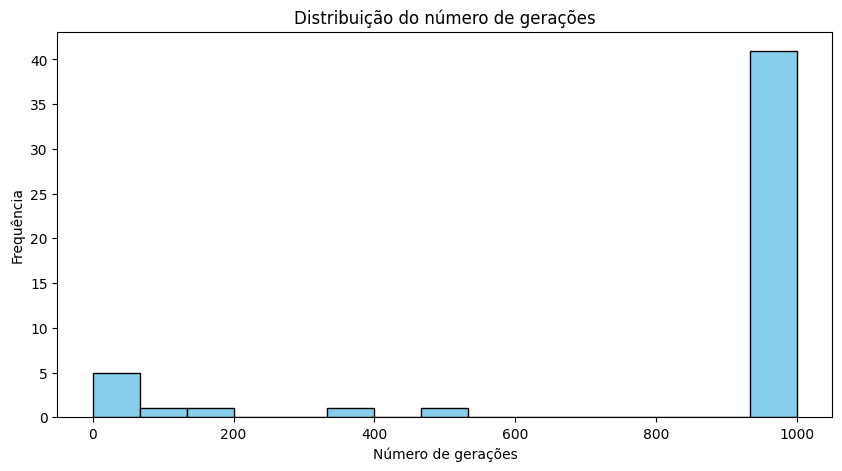

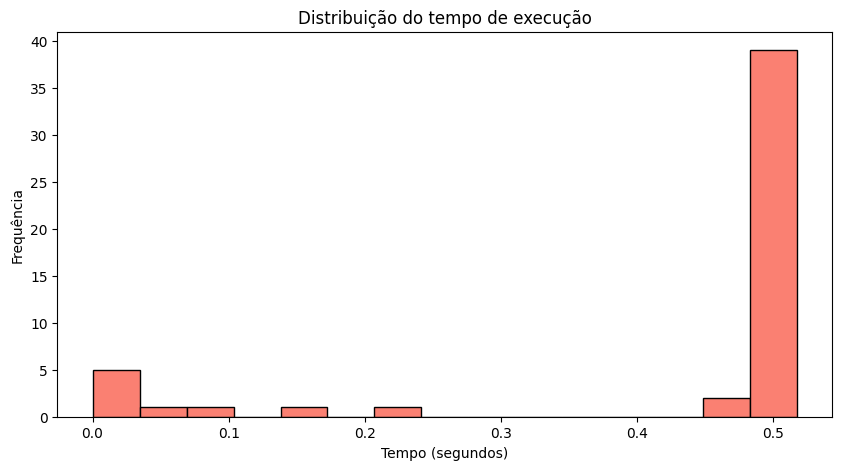

In [9]:
# Executa o algoritmo 50 vezes
resultados = []
solucoes = []
melhorias_aptidao = []  # Lista para armazenar a melhoria das aptidões para todas as execuções
for _ in range(50):  # Aqui você executa o algoritmo 50 vezes
    print("Execução ", _)
    solucao, geracoes, tempo_execucao, melhoria_aptidao_execucao = algoritmo_genetico()
    resultados.append((geracoes, tempo_execucao))
    solucoes.append(solucao)
    melhorias_aptidao.append(melhoria_aptidao_execucao)

# Calculando a média e desvio padrão do número de gerações e do tempo de execução
geracoes = [resultados[i][0] for i in range(len(resultados))]
tempos = [resultados[i][1] for i in range(len(resultados))]
media_geracoes = np.mean(geracoes)
desvio_geracoes = np.std(geracoes)
media_tempos = np.mean(tempos)
desvio_tempos = np.std(tempos)

print(f'Média de gerações: {media_geracoes}')
print(f'Desvio padrão de gerações: {desvio_geracoes}')
print(f'Média do tempo de execução: {media_tempos:.4f} segundos')
print(f'Desvio padrão do tempo de execução: {desvio_tempos:.4f} segundos')

# Encontrando as cinco melhores soluções distintas
melhores_solucoes = sorted(set(tuple(solucao) for solucao in solucoes), key=lambda x: calcular_valor_solucao(x))
melhores_solucoes = melhores_solucoes[:5]

print("Cinco melhores soluções encontradas:")
for i in range(len(melhores_solucoes)):
    print(f"Solucao {i}: {melhores_solucoes[i]} || Conflitos {calcular_valor_solucao(melhores_solucoes[i])}")

# Gráficos
# Gráfico do número de gerações
plt.figure(figsize=(10, 5))
plt.hist(geracoes, bins=15, color='skyblue', edgecolor='black')
plt.title("Distribuição do número de gerações")
plt.xlabel("Número de gerações")
plt.ylabel("Frequência")
plt.show()

# Gráfico do tempo de execução
plt.figure(figsize=(10, 5))
plt.hist(tempos, bins=15, color='salmon', edgecolor='black')
plt.title("Distribuição do tempo de execução")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Frequência")
plt.show()